<a href="https://colab.research.google.com/github/z-arabi/pytorchTutorial/blob/master/PyTorch_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch

# Create Tensor

In [ ]:
x = torch.tensor([5.5, 3])
x, x.size(), x.dtype

(tensor([5.5000, 3.0000]), torch.Size([2]), torch.float32)

In [ ]:
# torch.arange(<start>,<end>,<step-size>) > 1d tensor
x1 = torch.arange(2, 20, 2)

# torch.linspace(<start> , <end>, <number of elements>)
x2 = torch.linspace(1, 7.75, 4)

x1, x2

(tensor([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
 tensor([1.0000, 3.2500, 5.5000, 7.7500]))

In [ ]:
x1 = torch.empty(1)
x2 = torch.empty(3, dtype=torch.float16)
x3 = torch.empty(1,3)
x4 = torch.empty(2,3)
x5 = torch.empty(2,2,3)
x1, x2, x3, x4, x5, x5.size(), x1.dtype, x2.dtype

(tensor([2.3025e+38]),
 tensor([  0.4844,      nan, 100.3125], dtype=torch.float16),
 tensor([[2.3025e+38, 3.0948e-41, 0.0000e+00]]),
 tensor([[2.3025e+38, 3.0948e-41, 5.5000e+00],
         [7.7500e+00, 0.0000e+00, 0.0000e+00]]),
 tensor([[[2.3025e+38, 3.0948e-41, 0.0000e+00],
          [0.0000e+00, 0.0000e+00, 0.0000e+00]],
 
         [[0.0000e+00, 0.0000e+00, 0.0000e+00],
          [0.0000e+00, 0.0000e+00, 0.0000e+00]]]),
 torch.Size([2, 2, 3]),
 torch.float32,
 torch.float16)

In [ ]:
# torch.randint(<low>,<high>,<shape>)
x1 = torch.randint(5, 10, (3,3))

# rand > [0,1] > weights
x2 = torch.rand(2, 3)

x1, x2

(tensor([[6, 6, 5],
         [8, 9, 9],
         [5, 7, 8]]), tensor([[0.7954, 0.7700, 0.9977],
         [0.0862, 0.2626, 0.5422]]))

In [ ]:
real = torch.rand(2, 2)
imag = torch.rand(2, 2)
complex_tensor = torch.complex(real, imag)
complex_tensor

tensor([[0.6474+0.1279j, 0.8322+0.3029j],
        [0.7623+0.6384j, 0.8788+0.3169j]])

In [ ]:
# square 
eye = torch.eye(4)

zero = torch.zeros(5, 3)
one = torch.ones(5, 3)

# torch.full(<shape>,<value to be filled with>)
full = torch.full((3,2), 3)

eye, full

(tensor([[1., 0., 0., 0.],
         [0., 1., 0., 0.],
         [0., 0., 1., 0.],
         [0., 0., 0., 1.]]), tensor([[3, 3],
         [3, 3],
         [3, 3]]))

# Operations

In [ ]:
x = torch.rand(2, 3)
x , torch.sum(x), torch.sum(x,1)

(tensor([[0.4581, 0.7924, 0.4064],
         [0.9626, 0.4821, 0.4640]]), tensor(3.5656), tensor([1.6569, 1.9087]))

In [ ]:
x = torch.rand(2, 2)
y = torch.rand(2, 2)

z1 = x + y

z2 = torch.add(x,y)

z3 = y
z3.add_(x)

# x can be number
# z3.add_(1.2)

# z1 == z2 == z3

tensor([[1.0275, 1.8022],
        [0.4668, 0.7266]])

In [ ]:
# substraction
s1 = x - y
s2 = torch.sub(x, y)

# multiplication
m1 = x * y
m2 = torch.mul(x,y)

# division
d1 = x / y
d2 = torch.div(x,y)

# Slicing and Reshaping

In [ ]:
x = torch.rand(5,3)
x

tensor([[0.9447, 0.6615, 0.9550],
        [0.9629, 0.7382, 0.1693],
        [0.9695, 0.9684, 0.0728],
        [0.5589, 0.0693, 0.3803],
        [0.9658, 0.2968, 0.5036]])

In [ ]:
x[:, 0], x[1,:]

(tensor([0.9447, 0.9629, 0.9695, 0.5589, 0.9658]),
 tensor([0.9629, 0.7382, 0.1693]))

In [ ]:
x[1,1] , x[1,1].item()

(tensor(0.7382), 0.7382350564002991)

In [ ]:
x = torch.randn(4, 4)

y = x.view(16)
z = x.view(-1, 8)

x.size(), y.size(), z.size()

(torch.Size([4, 4]), torch.Size([16]), torch.Size([2, 8]))

# Convert to numpy

In [ ]:
import numpy as np

t = torch.ones(2,5)
# Carful: If the Tensor is on the CPU (not the GPU),
# both objects will share the same memory location, so changing one
# will also change the other
n = t.numpy()

t, n, type(t), type(n), t.dtype, n.dtype

(tensor([[1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.]]), array([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]], dtype=float32), torch.Tensor, numpy.ndarray, torch.float32, dtype('float32'))

In [ ]:
print(torch.cuda.device_count())
print(torch.cuda.current_device())
print(torch.cuda.device(0))
print(torch.cuda.get_device_name(0))

if torch.cuda.is_available():
  device = torch.device("cuda")
else:
  device = torch.device("cpu")
device

1
0
Tesla K80


device(type='cuda')

In [ ]:
# by default all tensors are created on the CPU,
# but you can also move them to the GPU (only if it's available )
x = torch.ones(5, device=device)

# more than one device > default is cpu
# .to > vise versa move to cpu or gpu > .to('cpu') / .to('cuda')
y = torch.ones(5)
y = y.to(device)

x,y

(tensor([1., 1., 1., 1., 1.], device='cuda:0'),
 tensor([1., 1., 1., 1., 1.], device='cuda:0'))

In [ ]:
n = np.ones(5)
t = torch.from_numpy(n)

type(t)

torch.Tensor

## AutoGrad

In [ ]:
# leaf > requires_grad=True > grad
# non-leaf > requires_grad=True > grad_fn
x = torch.tensor([1,2,3], dtype=torch.float32, requires_grad=True)
print(x)
y = x + 2
print(y)
z = y * y * 3
print(z)
z = z.mean()
print(z)

# z is scalar and initial is 1 > usually loss (scalar)
# backward when autograd is true
# we want to update weights
z.backward() # dz/d(leaf) > dz/dx = 1 * dmean/dz * dz/dy * dy/dx = 1*1/3*6y*1
print(x.grad)
print(2*y)

tensor([1., 2., 3.], requires_grad=True)
tensor([3., 4., 5.], grad_fn=<AddBackward0>)
tensor([27., 48., 75.], grad_fn=<MulBackward0>)
tensor(50., grad_fn=<MeanBackward0>)
tensor([ 6.,  8., 10.])
tensor([ 6.,  8., 10.], grad_fn=<MulBackward0>)


https://abishekbashyall.medium.com/playing-with-backward-method-in-pytorch-bd34b58745a0
<img src="https://miro.medium.com/max/1400/1*jJ8p5bTATJpZFtner6DYOw.png" />

In [ ]:
x = torch.tensor([1,2,3], dtype=torch.float32, requires_grad=True)
y = x + 2
z = y * y * 3

print(z.shape)
v = torch.tensor([0.1,1,0.2], dtype=torch.float32)
z.backward(v) #dz/dx = 6y >> 6y*v 
print(x.grad)
print(6*y*v)

torch.Size([3])
tensor([ 1.8000, 24.0000,  6.0000])
tensor([ 1.8000, 24.0000,  6.0000], grad_fn=<MulBackward0>)


In [ ]:
a = torch.randn(2, 2)
print(a.requires_grad)
b = ((a * 3) / (a - 1))
print(b.grad_fn)

a.requires_grad=True
b = ((a * 3) / (a - 1))
print(b.grad_fn)

# .detach(): get a new Tensor with the same content but no gradient computation:
c = a.detach()
print(c.requires_grad)

with torch.no_grad():
  print(a.requires_grad)
  d = ((a * 3) / (a - 1))
  print(d)

False
None
False
True
tensor([[ 1.7591, -1.6108],
        [ 7.0254, -1.5944]])


# Linear Regression

In [ ]:
import torch
import torch.nn as nn

In [ ]:
# backward() accumulates the gradient for this tensor into .grad attribute.
# !!! We need to be careful during optimization !!!
# Use .zero_() to empty the gradients before a new optimization step!


# with torch.no_grad():
#     w -= 0.01 * w.grad
# w.grad.zero_()

# optimizer = torch.optim.SGD([w], lr=learning_rate)
# optimizer.step()
# optimizer.zero_grad()

In [ ]:
# 1) Design model (input, output, forward pass with different layers)
# 2) Construct loss and optimizer(GD)
# 3) Training loop
#       - Forward = compute prediction and loss
#       - Backward = compute gradients
#       - Update weights

# 0) Training samples
X = torch.tensor([1, 2, 3, 4], dtype=torch.float32)
Y = torch.tensor([2, 4, 6, 8], dtype=torch.float32)

# 1) Design Model: Weights to optimize and forward function
w = torch.tensor(0.0, dtype=torch.float32, requires_grad=True)

# 2) Define loss and optimizer
learning_rate = 0.01
n_iters = 100

# callable function > mean square error
loss = nn.MSELoss()

# optimizer is the gradient discent calculation
optimizer = torch.optim.SGD([w], lr=learning_rate)

# 3) Training loop
for epoch in range(n_iters):

    # predict = forward pass
    y_predicted = w*X

    # loss
    l = loss(Y, y_predicted)

    # calculate gradients = backward pass
    l.backward()

    # update weights > instead of manually update the weights
    optimizer.step()

    # zero the gradients after updating
    optimizer.zero_grad()

    if (epoch+1) % 50 == 0:
        print('epoch ', epoch+1, ': w = ', w, ' loss = ', l)

epoch  50 : w =  tensor(1.9994, requires_grad=True)  loss =  tensor(3.6323e-06, grad_fn=<MseLossBackward0>)
epoch  100 : w =  tensor(2.0000, requires_grad=True)  loss =  tensor(8.9884e-13, grad_fn=<MseLossBackward0>)


In [ ]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

In [ ]:
'''
how to define a class of models > all are inhereted from nn.Module
class customLinearRegression(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(customLinearRegression, self).__init__()
        # define diferent layers
        self.model = nn.Linear(input_dim, output_dim)

    def forward(self, x):
        return self.model(x)

model = customLinearRegression(input_size, output_size)
predicted = model(x)

here the Linear Regression is built-in class
'''

'\nhow to define a class of models > all are inhereted from nn.Module\nclass customLinearRegression(nn.Module):\n    def __init__(self, input_dim, output_dim):\n        super(customLinearRegression, self).__init__()\n        # define diferent layers\n        self.model = nn.Linear(input_dim, output_dim)\n\n    def forward(self, x):\n        return self.model(x)\n\nmodel = customLinearRegression(input_size, output_size)\npredicted = model(x)\n\nhere the Linear Regression is built-in class\n'

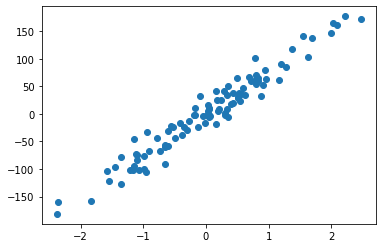

In [ ]:
# 0) Prepare data
X_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=4)
plt.plot(X_numpy,y_numpy,marker='o',linestyle='')

In [ ]:
X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))
y = y.view(y.shape[0], 1)
n_samples, n_features = X.shape

In [ ]:
# 1) Model
# Linear model f = wx + b
model = nn.Linear(n_features, 1)

# 2) Loss and optimizer
learning_rate = 0.01

criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# 3) Training loop
num_epochs = 100
for epoch in range(num_epochs):
  
    # Forward pass and loss
    y_predicted = model(X)
    loss = criterion(y_predicted, y)
    
    # Backward pass and update
    loss.backward()
    optimizer.step()

    # zero grad before new step
    optimizer.zero_grad()

    if (epoch+1) % 50 == 0:
        print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')

epoch: 50, loss = 1126.2290
epoch: 100, loss = 414.3737


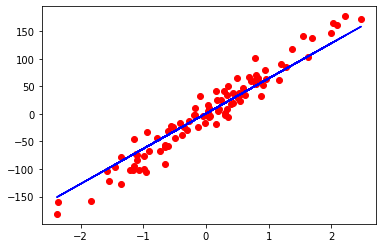

In [ ]:
# to plot with plt > convert tensor to numpy > .detach() to remove req grad > .numpy()
predicted = model(X).detach().numpy()

plt.plot(X_numpy, y_numpy, 'ro')
plt.plot(X_numpy, predicted, 'b')
plt.show()

# Logistic Regression

In [ ]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
bc = datasets.load_breast_cancer()
X, y = bc.data, bc.target
n_samples, n_features = X.shape

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

# scale
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# always converts to float32 first > then tensor
X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))

y_train = y_train.view(y_train.shape[0], 1)
y_test = y_test.view(y_test.shape[0], 1)

In [ ]:
# 1) Model
# in reg always we have one output > the output dim is 1
# Linear model f = wx + b , sigmoid at the end
class Model(nn.Module):
    def __init__(self, n_input_features):
        super(Model, self).__init__()
        self.linear = nn.Linear(n_input_features, 1)

    def forward(self, x):
        x = self.linear(x)
        y_pred = torch.sigmoid(x)
        return y_pred

model = Model(n_features)

In [ ]:
# 2) Loss and optimizer
num_epochs = 1000
learning_rate = 0.01

# binary cross entrophy
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [ ]:
# 3) Training loop
for epoch in range(num_epochs):
    # Forward pass and loss
    y_pred = model(X_train)
    loss = criterion(y_pred, y_train)

    # Backward pass and update
    loss.backward()
    optimizer.step()

    # zero grad before new step
    optimizer.zero_grad()

    if (epoch+1) % 100 == 0:
        print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')

epoch: 100, loss = 0.2534
epoch: 200, loss = 0.1810
epoch: 300, loss = 0.1498
epoch: 400, loss = 0.1317
epoch: 500, loss = 0.1196
epoch: 600, loss = 0.1108
epoch: 700, loss = 0.1040
epoch: 800, loss = 0.0986
epoch: 900, loss = 0.0941
epoch: 1000, loss = 0.0904


In [ ]:
# find the accuracy of the model mabually
with torch.no_grad():
    y_predicted = model(X_test)
    # sigmoid [0,1] , Th=0.5
    y_predicted_cls = y_predicted.round()
    acc = y_predicted_cls.eq(y_test).sum() / float(y_test.shape[0])
    print(f'accuracy: {acc.item():.4f}')

accuracy: 0.9211


# ِDataloader


In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader
import numpy as np
import math

In [ ]:
!git clone https://github.com/python-engineer/pytorchTutorial.git
% cd pytorchTutorial
% pwd

Cloning into 'pytorchTutorial'...
remote: Enumerating objects: 85, done.
remote: Counting objects: 100% (85/85), done.
remote: Compressing objects: 100% (65/65), done.
remote: Total 85 (delta 31), reused 67 (delta 16), pack-reused 0
Unpacking objects: 100% (85/85), done.
/content/pytorchTutorial


'/content/pytorchTutorial'

In [ ]:
xy = np.loadtxt('./data/wine/wine.csv', delimiter=',', dtype=np.float32, skiprows=1)

x_data = torch.from_numpy(xy[:, 1:]) # size [n_samples, n_features]
y_data = torch.from_numpy(xy[:, [0]]) # size [n_samples, 1]
x_data.size() , y_data.size()

(torch.Size([178, 13]), torch.Size([178, 1]))

In [ ]:
# Load whole dataset with DataLoader
# shuffle: shuffle data, good for training
# num_workers: faster loading with multiple subprocesses
# !!! IF YOU GET AN ERROR DURING LOADING, SET num_workers TO 0 !!!
train_loader = DataLoader(dataset=xy,
                          batch_size=4,
                          shuffle=True,
                          num_workers=2)

dataiter = iter(train_loader)
data = dataiter.next()
print(data.size())
x = data[:,1:]
y = data[:,[0]]
y

torch.Size([4, 14])


tensor([[2.],
        [2.],
        [1.],
        [2.]])

In [ ]:
# clean code
# inherit from Dataset class
class WineDataset(Dataset):
    def __init__(self):
        # Initialize data, download, etc.
        # read with numpy or pandas
        xy = np.loadtxt('./data/wine/wine.csv', delimiter=',', dtype=np.float32, skiprows=1)
        
        self.n_samples = xy.shape[0]

        # here the first column is the class label, the rest are the features
        self.x_data = torch.from_numpy(xy[:, 1:]) # size [n_samples, n_features]
        self.y_data = torch.from_numpy(xy[:, [0]]) # size [n_samples, 1]

    # support indexing such that dataset[i] can be used to get i-th sample
    def __getitem__(self, index):
        return self.x_data[index], self.y_data[index]

    # we can call len(dataset) to return the size
    def __len__(self):
        return self.n_samples

dataset = WineDataset()
train_loader = DataLoader(dataset=dataset,
                          batch_size=4,
                          shuffle=True,
                          num_workers=2)

dataiter = iter(train_loader)
data = dataiter.next()
features, labels = data
labels

tensor([[1.],
        [2.],
        [1.],
        [2.]])

In [ ]:
# Dummy Training loop
num_epochs = 2
batch_size = 4
total_samples = len(dataset)
n_iterations = math.ceil(total_samples/batch_size)

for epoch in range(num_epochs):
    for i, (inputs, labels) in enumerate(train_loader):
        # feed forward, update
        # here: 178 samples, batch_size = 4, n_iters=178/4=44.5 -> 45 iterations
        # Run your training process
        if (i+1) % 10 == 0:
            print(f'Epoch: {epoch+1}/{num_epochs}, Step {i+1}/{n_iterations}| Inputs {inputs.shape} | Labels {labels.shape}')
1

Epoch: 1/2, Step 10/45| Inputs torch.Size([4, 13]) | Labels torch.Size([4, 1])
Epoch: 1/2, Step 20/45| Inputs torch.Size([4, 13]) | Labels torch.Size([4, 1])
Epoch: 1/2, Step 30/45| Inputs torch.Size([4, 13]) | Labels torch.Size([4, 1])
Epoch: 1/2, Step 40/45| Inputs torch.Size([4, 13]) | Labels torch.Size([4, 1])
Epoch: 2/2, Step 10/45| Inputs torch.Size([4, 13]) | Labels torch.Size([4, 1])
Epoch: 2/2, Step 20/45| Inputs torch.Size([4, 13]) | Labels torch.Size([4, 1])
Epoch: 2/2, Step 30/45| Inputs torch.Size([4, 13]) | Labels torch.Size([4, 1])
Epoch: 2/2, Step 40/45| Inputs torch.Size([4, 13]) | Labels torch.Size([4, 1])


1

In [ ]:
# available datasets
import torchvision

# https://pytorch.org/vision/stable/datasets.html
# <class 'PIL.Image.Image'> to tensor
dataset = torchvision.datasets.MNIST(root='./data',download=True,train=True,
                                     transform=torchvision.transforms.ToTensor())

train_loader = DataLoader(dataset=dataset, batch_size=3, shuffle=True)
dataiter = iter(train_loader)
data = dataiter.next()
inputs, targets = data
print(inputs.shape, targets.shape)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

torch.Size([3, 1, 28, 28]) torch.Size([3])


# Dataset Transforms[extra]

In [ ]:
import torch
import torchvision


complete list of built-in transforms: https://pytorch.org/vision/0.8/transforms.html

In [ ]:
# in build in datasets we have transform argument > so we want to add it to our own
class WineDataset(Dataset):

    def __init__(self, transform=None):
        xy = np.loadtxt('./data/wine/wine.csv', delimiter=',', dtype=np.float32, skiprows=1)
        self.n_samples = xy.shape[0]

        # note that we do not convert to tensor here
        self.x_data = xy[:, 1:]
        self.y_data = xy[:, [0]]

        self.transform = transform

    def __getitem__(self, index):
        sample = self.x_data[index], self.y_data[index]

        # transfrom is a function that takes the data
        if self.transform:
            sample = self.transform(sample)

        return sample

    def __len__(self):
        return self.n_samples

In [ ]:
# Custom Transforms
# implement __call__(self, sample)
class ToTensor:
    # Convert ndarrays to Tensors
    def __call__(self, sample):
        inputs, targets = sample
        # the same outputs the same returns
        return torch.from_numpy(inputs), torch.from_numpy(targets)

class MulTransform:
    # multiply inputs with a given factor
    def __init__(self, factor):
        self.factor = factor

    def __call__(self, sample):
        inputs, targets = sample
        inputs *= self.factor
        return inputs, targets

In [ ]:
npdataset = WineDataset()

tensordataset = WineDataset(transform=ToTensor())

composed = torchvision.transforms.Compose([ToTensor(), MulTransform(4)])
composeddataset = WineDataset(transform=composed)

# MLP


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
'''
The implementations in torch.xxx have the backward implemented using python calls 282, 
while the functional counterparts have their backward implemented entirely in C 39/Cuda 37, 
so the functional backward code is more efficient.
torch.nn.Sigmoid calls torch.nn.functional.sigmoid in the background, 
and the functional and torch.xxx calls differ with their backwards implementation 
(which is more efficient and GPU capable in the torch.nn case)
'''

x = torch.tensor([-1.0, 1.0, 2.0, 3.0])

# sofmax
output = torch.softmax(x, dim=0)

sm = nn.Softmax(dim=0)
output = sm(x)

# sigmoid, tanh, relu

# leaky relu
output = F.leaky_relu(x)

lrelu = nn.LeakyReLU()
output = lrelu(x)

In [ ]:
# onehot labels > softmax predicted > cross_entropy
# CrossEntropyLoss in PyTorch (applies Softmax)
# nn.LogSoftmax + nn.NLLLoss
# NLLLoss = negative log likelihood loss
loss = nn.CrossEntropyLoss()
# loss(input, target)

# Y (=target) contains class labels, not one-hot
# nBatch = 3
# each element has class label: 0, 1, or 2
Y = torch.tensor([2, 0, 1])
# input is of size nBatch x nClasses = 3 x 3
# Y_pred are logits (not softmax)
Y_pred = torch.tensor(
    [[0.1, 0.2, 3.9], # predict class 2
    [1.2, 0.1, 0.3], # predict class 0
    [0.3, 2.2, 0.2]]) # predict class 1
print(loss(Y_pred, Y).item())

_, preds = torch.max(Y_pred, 1)
preds, torch.argmax(Y_pred, 1)

0.28342217206954956


(tensor([2, 0, 1]), tensor([2, 0, 1]))

In [ ]:
# Multiclass
class NeuralNetMul(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNetMul, self).__init__()
        self.linear1 = nn.Linear(input_size, hidden_size) 
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(hidden_size, num_classes)  
    
    def forward(self, x):
        out = self.linear1(x)
        out = self.relu(out)
        out = self.linear2(out)
        # no softmax at the end
        return out

model = NeuralNetMul(input_size=28*28, hidden_size=5, num_classes=3)
criterion = nn.CrossEntropyLoss()
# model.forward(X) >> X is 28*28
# criterian(out,Y_actual)

In [ ]:
# for binary classifcation > u can use just one output + sigmoid function
# OR two outputs + softmax functions

# Binary classification
#directly add activation functions as layers
class NeuralNetBin1(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(NeuralNetBin1, self).__init__()
        self.linear1 = nn.Linear(input_size, hidden_size) 
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(hidden_size, 1)  
        self.sigmoid = nn.Sigmoid()
    
    def forward(self, x):
        out = self.linear1(x)
        out = self.relu(out)
        out = self.linear2(out)
        out = self.sigmoid(out)
        return out

class NeuralNetBin2(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(NeuralNetBin2, self).__init__()
        self.linear1 = nn.Linear(input_size, hidden_size)
        self.linear2 = nn.Linear(hidden_size, 1)  
    
    def forward(self, x):
        out = self.linear1(x)
        out = torch.relu(out)
        out = self.linear2(out)
        y_pred = torch.sigmoid(out)
        return y_pred

model1 = NeuralNetBin1(input_size=28*28, hidden_size=5)
model2 = NeuralNetBin2(input_size=28*28, hidden_size=5)
# binary cross ent
criterion = nn.BCELoss()
# model.forward(X) >> X is 28*28
# criterian(out,Y_actual)

# Feed Forward

In [ ]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [ ]:
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyper-parameters 
input_size = 784 # 28x28
hidden_size = 500 
num_classes = 10
num_epochs = 2
batch_size = 100
learning_rate = 0.001

In [ ]:
# MNIST dataset 
train_dataset = torchvision.datasets.MNIST(root='./data', 
                                           train=True, 
                                           transform=transforms.ToTensor(),  
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='./data', 
                                          train=False, 
                                          transform=transforms.ToTensor())

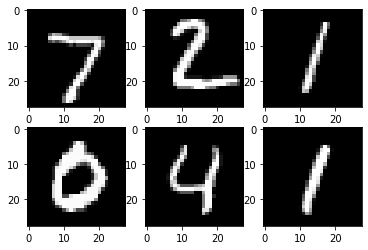

In [ ]:
# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

examples = iter(test_loader)
example_data, example_targets = examples.next()

for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(example_data[i][0], cmap='gray')
plt.show()

In [ ]:
# Fully connected neural network with one hidden layer
# input_size if the number of features of a sample > here for one image 28*28=784

class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.input_size = input_size
        self.l1 = nn.Linear(input_size, hidden_size) 
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size, num_classes)  
    
    def forward(self, x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        # no activation and no softmax at the end
        return out

In [ ]:
model = NeuralNet(input_size, hidden_size, num_classes).to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)  

# Train the model
n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):  
        # origin shape: [100, 1, 28, 28]
        # resized: [100, 784]
        # add the one to the dim
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 200 == 0:
            print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')


Epoch [1/2], Step [200/600], Loss: 0.2059
Epoch [1/2], Step [400/600], Loss: 0.1978
Epoch [1/2], Step [600/600], Loss: 0.0881
Epoch [2/2], Step [200/600], Loss: 0.1418
Epoch [2/2], Step [400/600], Loss: 0.2063
Epoch [2/2], Step [600/600], Loss: 0.0710


In [ ]:
# Test the model
# In test phase, we don't need to compute gradients (for memory efficiency)
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    # loads based on batch size
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)
        # max returns (value ,index)
        _, predicted = torch.max(outputs, 1)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()

    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network on the 10000 test images: {acc} %')

Accuracy of the network on the 10000 test images: 97.03 %


# CNN

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyper-parameters 
num_epochs = 5
batch_size = 4
learning_rate = 0.001

In [ ]:
# dataset has PILImage images of range [0, 1]. 
# We transform them to Tensors of normalized range [-1, 1]
# image = (image - mean) / std > [0,1] > [-1,1]
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# CIFAR10: 60000 32x32 color images in 10 classes, with 6000 images per class
train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)

test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size,
                                          shuffle=True)

test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size,
                                         shuffle=False)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [ ]:
def imshow(img):
    img = img / 2 + 0.5  # unnormalize > [-1,1] > [0,1]
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

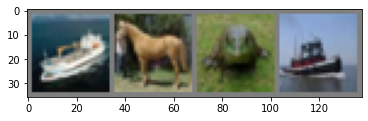

In [ ]:
# get some random training images
dataiter = iter(train_loader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))

In [ ]:
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        # 3 colors input channel sizes, output channel size is 6, kernel size is 5
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        # we have 10 classes > the output is 10
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # -> n, 3, 32, 32
        x = self.pool(F.relu(self.conv1(x)))  # -> n, 6, 14, 14
        x = self.pool(F.relu(self.conv2(x)))  # -> n, 16, 5, 5
        x = x.view(-1, 16 * 5 * 5)            # -> n, 400
        x = F.relu(self.fc1(x))               # -> n, 120
        x = F.relu(self.fc2(x))               # -> n, 84
        x = self.fc3(x)                       # -> n, 10
        return x

In [ ]:
model = ConvNet().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # origin shape: [4, 3, 32, 32] = 4, 3, 1024
        # input_layer: 3 input channels, 6 output channels, 5 kernel size
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 10000 == 0:
            print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')


print('Finished Training')
PATH = './cnn.pth'
torch.save(model.state_dict(), PATH)

Epoch [1/5], Step [10000/12500], Loss: 2.3528
Epoch [2/5], Step [10000/12500], Loss: 1.8228
Epoch [3/5], Step [10000/12500], Loss: 2.3800
Epoch [4/5], Step [10000/12500], Loss: 1.6276
Epoch [5/5], Step [10000/12500], Loss: 1.2938
Finished Training


In [ ]:
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    n_class_correct = [0 for i in range(10)]
    n_class_samples = [0 for i in range(10)]
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        # max returns (value ,index)
        _, predicted = torch.max(outputs, 1)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()
        
        for i in range(batch_size):
            label = labels[i]
            pred = predicted[i]
            if (label == pred):
                n_class_correct[label] += 1
            n_class_samples[label] += 1

    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network: {acc} %')

    for i in range(10):
        acc = 100.0 * n_class_correct[i] / n_class_samples[i]
        print(f'Accuracy of {classes[i]}: {acc} %')

Accuracy of the network: 49.31 %
Accuracy of plane: 58.8 %
Accuracy of car: 55.0 %
Accuracy of bird: 35.7 %
Accuracy of cat: 29.0 %
Accuracy of deer: 38.2 %
Accuracy of dog: 35.2 %
Accuracy of frog: 58.6 %
Accuracy of horse: 67.2 %
Accuracy of ship: 60.0 %
Accuracy of truck: 55.4 %


# Transfer Learning

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy

In [ ]:
! git clone https://github.com/z-arabi/pytorchTutorial.git
% cd pytorchTutorial
% pwd

Cloning into 'pytorchTutorial'...
remote: Enumerating objects: 568, done.
remote: Counting objects: 100% (568/568), done.
remote: Compressing objects: 100% (543/543), done.
remote: Total 568 (delta 70), reused 476 (delta 18), pack-reused 0
Receiving objects: 100% (568/568), 52.94 MiB | 12.16 MiB/s, done.
Resolving deltas: 100% (70/70), done.
/content/pytorchTutorial/pytorchTutorial/pytorchTutorial


'/content/pytorchTutorial/pytorchTutorial/pytorchTutorial'

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# normalize to [-1,1]
mean = np.array([0.5, 0.5, 0.5])
std = np.array([0.25, 0.25, 0.25])

In [ ]:
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize(mean, std)
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean, std)
    ]),
}

data_dir = 'data/hymenoptera_data'
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),data_transforms[x]) for x in ['train', 'val']}

In [ ]:
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4,
                                             shuffle=True, num_workers=0)
              for x in ['train', 'val']}

dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
print(dataset_sizes)

class_names = image_datasets['train'].classes
print(class_names)

{'train': 244, 'val': 153}
['ants', 'bees']


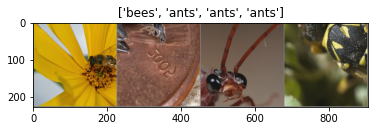

In [ ]:
def imshow(inp, title):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    plt.title(title)
    plt.show()


# Get a batch of training data
inputs, classes = next(iter(dataloaders['train']))

# Make a grid from batch
out = torchvision.utils.make_grid(inputs)

imshow(out, title=[class_names[x] for x in classes])

In [ ]:
def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        optimizer.zero_grad()
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            if phase == 'train':
                scheduler.step()

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(
                phase, epoch_loss, epoch_acc))

            # deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model

In [ ]:
# Let's use transfer learning
#### Finetuning the convnet ####
# Load a pretrained model and reset final fully connected layer.
model = models.resnet18(pretrained=True)

# change the last fully connected layers > input features
num_ftrs = model.fc.in_features
# Here the size of each output sample is set to 2.
# Alternatively, it can be generalized to nn.Linear(num_ftrs, len(class_names)).
model.fc = nn.Linear(num_ftrs, 2)

model = model.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
optimizer = optim.SGD(model.parameters(), lr=0.001)

# StepLR Decays the learning rate of each parameter group by gamma every step_size epochs
# Decay LR by a factor of 0.1 every 7 epochs
# Learning rate scheduling should be applied after optimizer’s update
# e.g., you should write your code this way:
# for epoch in range(100):
#     train(...)
#     validate(...)
#     scheduler.step()

step_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

model = train_model(model, criterion, optimizer, step_lr_scheduler, num_epochs=25)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

Epoch 0/24
----------
train Loss: 0.5803 Acc: 0.7254
val Loss: 0.3945 Acc: 0.8562

Epoch 1/24
----------
train Loss: 0.4858 Acc: 0.7705
val Loss: 0.3232 Acc: 0.9020

Epoch 2/24
----------
train Loss: 0.4214 Acc: 0.8279
val Loss: 0.2630 Acc: 0.9281

Epoch 3/24
----------
train Loss: 0.4117 Acc: 0.8074
val Loss: 0.2529 Acc: 0.9281

Epoch 4/24
----------
train Loss: 0.4291 Acc: 0.8074
val Loss: 0.2295 Acc: 0.9150

Epoch 5/24
----------
train Loss: 0.4062 Acc: 0.8279
val Loss: 0.2137 Acc: 0.9346

Epoch 6/24
----------
train Loss: 0.3714 Acc: 0.8566
val Loss: 0.2089 Acc: 0.9346

Epoch 7/24
----------
train Loss: 0.3463 Acc: 0.8770
val Loss: 0.2465 Acc: 0.9085

Epoch 8/24
----------
train Loss: 0.3303 Acc: 0.8566
val Loss: 0.2165 Acc: 0.9216

Epoch 9/24
----------
train Loss: 0.3641 Acc: 0.8402
val Loss: 0.2214 Acc: 0.9150

Epoch 10/24
----------
train Loss: 0.3296 Acc: 0.8648
val Loss: 0.2113 Acc: 0.9216

Epoch 11/24
----------
train Loss: 0.4101 Acc: 0.7787
val Loss: 0.2098 Acc: 0.9216

Ep

In [ ]:
#### ConvNet as fixed feature extractor ####
# Here, we need to freeze all the network except the final layer.
# We need to set requires_grad == False to freeze the parameters so that the gradients are not computed in backward()
model_conv = torchvision.models.resnet18(pretrained=True)
for param in model_conv.parameters():
    param.requires_grad = False

# Parameters of newly constructed modules have requires_grad=True by default
num_ftrs = model_conv.fc.in_features
model_conv.fc = nn.Linear(num_ftrs, 2)

model_conv = model_conv.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that only parameters of final layer are being optimized as
# opposed to before.
optimizer_conv = optim.SGD(model_conv.fc.parameters(), lr=0.001, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_conv, step_size=7, gamma=0.1)

model_conv = train_model(model_conv, criterion, optimizer_conv,
                         exp_lr_scheduler, num_epochs=25)

Epoch 0/24
----------
train Loss: 0.7019 Acc: 0.5533
val Loss: 0.3089 Acc: 0.8758

Epoch 1/24
----------
train Loss: 0.5090 Acc: 0.7951
val Loss: 0.1826 Acc: 0.9346

Epoch 2/24
----------
train Loss: 0.3742 Acc: 0.8443
val Loss: 0.1631 Acc: 0.9412

Epoch 3/24
----------
train Loss: 0.3775 Acc: 0.8156
val Loss: 0.3616 Acc: 0.8562

Epoch 4/24
----------
train Loss: 0.4739 Acc: 0.8320
val Loss: 0.1706 Acc: 0.9412

Epoch 5/24
----------
train Loss: 0.5455 Acc: 0.7992
val Loss: 0.1866 Acc: 0.9346

Epoch 6/24
----------
train Loss: 0.3936 Acc: 0.8402
val Loss: 0.1762 Acc: 0.9412

Epoch 7/24
----------
train Loss: 0.3577 Acc: 0.8484
val Loss: 0.1572 Acc: 0.9477

Epoch 8/24
----------
train Loss: 0.2990 Acc: 0.8770
val Loss: 0.1637 Acc: 0.9412

Epoch 9/24
----------
train Loss: 0.4631 Acc: 0.7746
val Loss: 0.1454 Acc: 0.9412

Epoch 10/24
----------
train Loss: 0.3248 Acc: 0.8238
val Loss: 0.1892 Acc: 0.9281

Epoch 11/24
----------
train Loss: 0.3098 Acc: 0.8566
val Loss: 0.2074 Acc: 0.9150

Ep

# Save and Load

In [ ]:
import torch
import torch.nn as nn

In [ ]:
''' 3 DIFFERENT METHODS TO REMEMBER:
 - torch.save(arg, PATH) # can be model, tensor, or dictionary
 - torch.load(PATH)
 - torch.load_state_dict(arg)
'''

''' 2 DIFFERENT WAYS OF SAVING
# 1) lazy way: save whole model
torch.save(model, PATH)

# model class must be defined somewhere
model = torch.load(PATH)
model.eval()

# 2) recommended way: save only the state_dict
torch.save(model.state_dict(), PATH)

# model must be created again with parameters
model = Model(*args, **kwargs)
model.load_state_dict(torch.load(PATH))
model.eval()
'''

In [ ]:
class Model(nn.Module):
    def __init__(self, n_input_features):
        super(Model, self).__init__()
        self.linear = nn.Linear(n_input_features, 1)

    def forward(self, x):
        y_pred = torch.sigmoid(self.linear(x))
        return y_pred

model = Model(n_input_features=6)
# train your model...

In [ ]:
# save and load entire model
FILE = "model.pth"
torch.save(model, FILE)

loaded_model = torch.load(FILE)
loaded_model.eval()

for param in loaded_model.parameters():
    print(param)

Parameter containing:
tensor([[ 0.2038,  0.1606, -0.0363,  0.0034, -0.0133, -0.0835]],
       requires_grad=True)
Parameter containing:
tensor([0.0550], requires_grad=True)


In [ ]:
# save only state dict
FILE = "model.pth"
torch.save(model.state_dict(), FILE)

print(model.state_dict())
loaded_model = Model(n_input_features=6)
loaded_model.load_state_dict(torch.load(FILE)) # it takes the loaded dictionary, not the path file itself
loaded_model.eval()

print(loaded_model.state_dict())

OrderedDict([('linear.weight', tensor([[ 0.2038,  0.1606, -0.0363,  0.0034, -0.0133, -0.0835]])), ('linear.bias', tensor([0.0550]))])
OrderedDict([('linear.weight', tensor([[ 0.2038,  0.1606, -0.0363,  0.0034, -0.0133, -0.0835]])), ('linear.bias', tensor([0.0550]))])


In [ ]:
###########load checkpoint#####################
learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

checkpoint = {
"epoch": 90,
"model_state": model.state_dict(),
"optim_state": optimizer.state_dict()
}
print(optimizer.state_dict())
FILE = "checkpoint.pth"
torch.save(checkpoint, FILE)

model = Model(n_input_features=6)
optimizer = torch.optim.SGD(model.parameters(), lr=0)

checkpoint = torch.load(FILE)
model.load_state_dict(checkpoint['model_state'])
optimizer.load_state_dict(checkpoint['optim_state'])
epoch = checkpoint['epoch']

model.eval()
# - or -
# model.train()

print(optimizer.state_dict())

# Remember that you must call model.eval() to set dropout and batch normalization layers 
# to evaluation mode before running inference. Failing to do this will yield 
# inconsistent inference results. If you wish to resuming training, 
# call model.train() to ensure these layers are in training mode.

{'state': {}, 'param_groups': [{'lr': 0.01, 'momentum': 0, 'dampening': 0, 'weight_decay': 0, 'nesterov': False, 'params': [0, 1]}]}
{'state': {}, 'param_groups': [{'lr': 0.01, 'momentum': 0, 'dampening': 0, 'weight_decay': 0, 'nesterov': False, 'params': [0, 1]}]}
